In [2]:
import os
import cv2
import json
import importlib
import numpy as np
from PIL import Image
from IPython.display import display
import utils.process_utils as process_utils
importlib.reload(process_utils)

<module 'utils.process_utils' from '/home/shitianhao/project/DatProc/utils/process_utils.py'>

In [3]:
# open json file
json_path = '/datar/DAD-3DHeads/val/meta_1-1.json'

image_folder_dir = os.path.dirname(json_path)

with open(json_path) as json_file:
    data = json.load(json_file)


FileNotFoundError: [Errno 2] No such file or directory: '/datar/DAD-3DHeads/val/meta_1-1.json'

In [ ]:
vis_sample = 20

for img_path, meta in data.items():
    # load image
    abs_img_path = os.path.join(image_folder_dir, img_path)
    for box_id, box_meta in meta.items():
        lm = box_meta['landmarks']
        box = box_meta['head_box']
        if lm is None: continue
        img = cv2.imread(abs_img_path)
        box_x, box_y, box_w, box_h = box
        box_img = img[box_y:box_y+box_h, box_x:box_x+box_w].copy()
        vis_scale = 512/box_h
        for pt in lm:
            pt = (int(pt[0]), int(pt[1]))
            cv2.circle(box_img, pt, int(4/vis_scale), [0, 255, 0], -1)
        box_img_ = cv2.cvtColor(box_img, cv2.COLOR_BGR2RGB)
        box_img_ = cv2.resize(box_img_, (512, 512))
        display(Image.fromarray(box_img_))
        vis_sample -= 1
    if vis_sample == 0: break


# K-Hairstyle Face Mask Visualization

In [ ]:
'''
Author: tianhao 120090472@link.cuhk.edu.cn
Date: 2023-09-27 21:12:02
LastEditors: tianhao 120090472@link.cuhk.edu.cn
LastEditTime: 2023-09-27 21:16:00
FilePath: /DatProc/misc.ipynb
Description: 

Copyright (c) 2023 by ${git_name_email}, All Rights Reserved. 
'''
import cv2
import numpy as np
import PIL.Image as Image
from IPython.display import display
from utils.khs_filter import process_json
khs_sample_json_path = './assets/MN322068_040.json'
image_path = './assets/MN322068-040.jpg'
polygon = process_json(khs_sample_json_path)

image = np.array(Image.open(image_path))
h, w = image.shape[:2]
scale = 512/h
coords_list = []
for pt in polygon:
    pt_coord = [int(pt['X']), int(pt['Y'])]
    # cv2.circle(image, pt_coord, int(2/scale), [0, 255, 0], -1)
    coords_list.append(pt_coord)
coords = np.array(coords_list).reshape((-1, 1, 2))
image = cv2.fillPoly(image, [coords], color=[0, 255, 0])
# image = cv2.resize(image, (0,0), fx=scale, fy=scale)
display(Image.fromarray(image))

# FFHQ Landmark Visualization

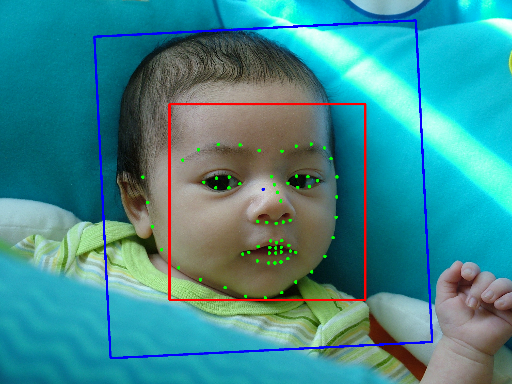

In [ ]:
import os
import cv2
import json
import numpy as np
from PIL import Image
from IPython.display import display

ffhq_lm_path = 'assets/ffhq-sample.json'
ffhq_datset_path = '/datar/FFHQ/'
with open(ffhq_lm_path, 'r') as json_file:
    data = json.load(json_file)
itw_img_path = data["0"]["in_the_wild"]["file_path"]
itw_img_path = os.path.join(ffhq_datset_path, itw_img_path)
max_side = 512
image = Image.open(itw_img_path)
lm = data["0"]["in_the_wild"]["face_landmarks"]
rect = data["0"]["in_the_wild"]["face_rect"]
quad = data["0"]["in_the_wild"]["face_quad"]
quad = np.array(quad, np.int32).reshape((-1, 1, 2))
quad_center = np.mean(quad[:, 0, :], axis=0).astype(np.int32)
x_1, y_1, x_2, y_2= rect
image = np.array(image)
for pt in lm:
    pt_int = (int(pt[0]), int(pt[1]))
    image = cv2.circle(image, pt_int, int(2/scale), [0, 255, 0], -1)
image = cv2.circle(image, quad_center, int(2/scale), [0, 0, 255], -1)
cv2.rectangle(image, (x_1, y_1), (x_2, y_2), [255, 0, 0], int(2/scale)) # not sure if this is the correct box
scale = 512 / np.max(image.shape[:2])
image = cv2.polylines(image, [quad], isClosed=True, color=[0, 0, 255], thickness=int(2/scale))
image = cv2.resize(image, (0,0), fx=scale, fy=scale)
display(Image.fromarray(image))



Conclusion: the json of FFHQ follows the following convention:
```json
{
    "data_index":{
        "category": "Training/Validating...",
        "metadata": {...},
        "image" : {
            // image attributes. the attributes for image, thumbnail and in-the-wild is same
        },
        "thumbnail":{},
        "in-the-wild":{
            "file_path": "relative path with the current json", // note that the 00000 in between the path should be deleted,
            "pixel_size":[
                1000,
                2000
            ], // image size
            "face_landmarks":[
                ["x1", "y1"],
                ["x2", "y2"],
                ......
                ["x68", "y68"]
            ], //facial landmark
        }
    }
}
```

# LPFF Landmark Visualization

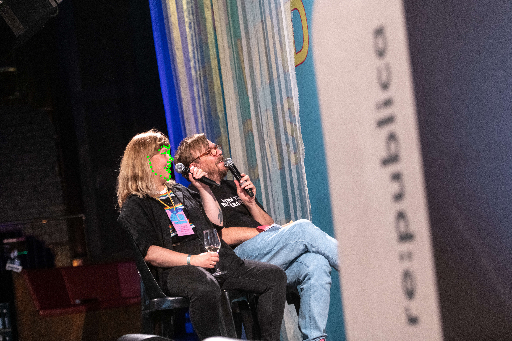

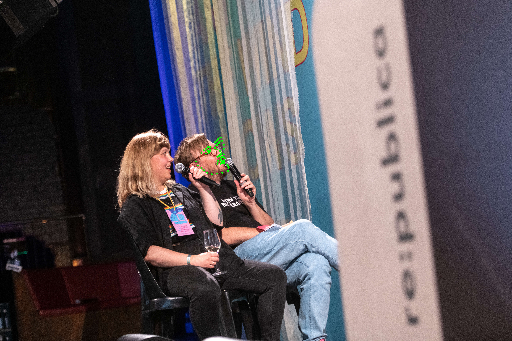

In [ ]:
import os
import cv2
import json
import numpy as np
from PIL import Image
from IPython.display import display

LPFF_META_PATH = '/home/shitianhao/project/DatProc/temp/raw_lm_sample.json'
LPFF_IMAGE_PATH = '/datar/LPFF/raw/'
with open(LPFF_META_PATH, 'r') as json_file:
    data = json.load(json_file)
for raw_img_name in data.keys():
    img_path = os.path.join(LPFF_IMAGE_PATH, f'{raw_img_name[:-3]}.png')
    image = Image.open(img_path)
    image = np.array(image)
    scale = 512 / np.max(image.shape[:2])
    lm = data[raw_img_name]
    for pt in lm:
        cv2.circle(image, pt, int(1/scale), [0, 255, 0], -1)
    image = cv2.resize(image, (0,0), fx=scale, fy=scale)
    display(Image.fromarray(image))

In [ ]:
RAW_LPFF_META = '/datar/LPFF/raw_lm.json'
with open(RAW_LPFF_META, 'r') as json_file:
    data = json.load(json_file)
img_names = []
attr_names = []
total = len(os.listdir(LPFF_IMAGE_PATH))
for raw_img_name in data.keys():
    img_name = raw_img_name[:-3]
    img_names.append(img_name)
    attr_names.append(raw_img_name)
attr_names = set(attr_names)
img_names = set(img_names)
if len(set(attr_names)) != len(set(img_names)):
    print(f"attr_names: {len(attr_names)}, img_names: {len(img_names)}")
    print(f"Total num of images: {total}")
for img_name in img_names:
    same_img = []
    for attr_name in attr_names:
        if attr_name.startswith(img_name):
            same_img.append(attr_name)
    if len(same_img) > 1:
        print(f"img_name: {img_name}, same_img: {same_img}")

Conclusion: the json of FFHQ follows the following notation:
```json
{
    "img_name":[
        ["x_1", "y_1"],
        ["x_2", "y_2"],
        ......
        ["x_68", "y_68"]
    ]
}
```

# Renaming the meta files of WEB Dataset
The following cell is a one-off script that modifies meta files of WEB dataset.
It changes the paths in these files from absolute path to relative path.

In [ ]:
import os
import json
from tqdm import tqdm
from utils.process_utils import find_meta_files

WEB_DATASET_PATH = '/datar/Web/'

meta_file_paths = find_meta_files(WEB_DATASET_PATH)
renamed_attrs = ["head_image_path" ,"head_parsing_path" ,"align_image_path" ,"align_parsing_path"]

for meta_file_path in tqdm(meta_file_paths, position=0, leave=True):
    with open(meta_file_path, 'r') as json_file:
        data = json.load(json_file)
    for img_rel_path in tqdm(data.keys(), position=1, leave=False):
        for box in data[img_rel_path]["head"].keys():
            if data[img_rel_path]["raw"]["q2b_tf"][box] is None: continue
            for attr in renamed_attrs:
                data[img_rel_path]["head"][box][attr] = data[img_rel_path]["head"][box][attr].replace('/datar/Web/', '')
    with open(meta_file_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)


100%|██████████| 3/3 [00:33<00:00, 11.33s/it]


# Creating a subset of WEB Dataset
The following is a one-off script used to create a subset from the WEB dataset

In [ ]:
import os
import shutil
from tqdm import tqdm

orgn_dataset_dir = '/datar/Web'
new_dataset_dir = '/datar/Web_small'
image_src_dir = os.path.join(orgn_dataset_dir, 'Data')
image_dst_dir = os.path.join(new_dataset_dir, 'Data')

os.makedirs(new_dataset_dir, exist_ok=True)
os.makedirs(image_dst_dir, exist_ok=True)

size_small_dataset = 1000

for i, image_name in tqdm(enumerate(os.listdir(image_src_dir)), total=size_small_dataset):
    if i >= size_small_dataset: break
    shutil.copy(os.path.join(image_src_dir, image_name), os.path.join(image_dst_dir, image_name))

# Learining KDE
Trying to emulate a KDE model using the following code

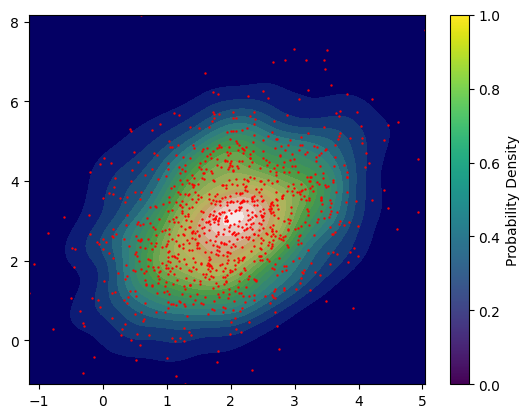

0.11570010991900415 5.204124950465026e-14


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

def generate_random_bivariate_gaussian(mean, cov_matrix, num_points):
    """
    Generate random (X, Y) points following a bivariate Gaussian distribution.

    Args:
        mean: A tuple (mean_x, mean_y) representing the mean of the distribution.
        cov_matrix: A 2x2 covariance matrix.
        num_points: The number of random points to generate.

    Returns:
        A NumPy array of shape (num_points, 2) containing the generated points.
    """
    # Generate random samples from a standard bivariate normal distribution
    points = np.random.multivariate_normal(mean, cov_matrix, num_points)
    return points

mean = [2, 3]
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]])
num_points = 1000

# generate random points
random_points = generate_random_bivariate_gaussian(mean, cov_matrix, num_points)
x_min, y_min = random_points.min(axis=0)
x_max, y_max = random_points.max(axis=0)

# perform KDE
kernel = stats.gaussian_kde(random_points.T, bw_method='silverman')
# generate ground-truth distribution
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
pos = np.dstack((X, Y))
kernel_pos = np.vstack([X.ravel(), Y.ravel()])
z_bar = np.reshape(kernel(kernel_pos).T, X.shape)
rv = stats.multivariate_normal(mean, cov_matrix)
z = rv.pdf(pos)

# plt.contourf(X, Y, z, levels=20, cmap='gist_earth')
plt.contourf(X, Y, z_bar, levels=20, cmap='gist_earth')
plt.scatter(random_points[:, 0], random_points[:, 1], s=0.5, c='r')
plt.colorbar(label="Probability Density")
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
plt.show()
print(z_bar.max(), z_bar.min())


# FFHQ theta-Phi visualization

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:26<00:00,  3.73s/it]


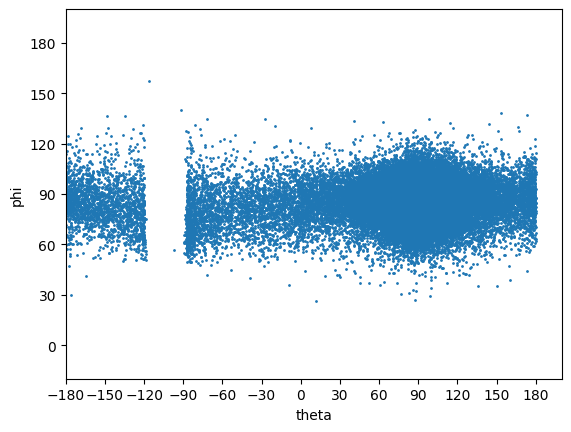

In [ ]:
import json
import numpy as np
from tqdm import tqdm

from utils.process_utils import find_meta_files
from utils.cam_pose_utils import get_cam_coords

json_file_paths = find_meta_files('./temp/ffhq_meta/')
coords = []
for json_file_path in tqdm(json_file_paths, position=0, leave=True):
    with open(json_file_path, 'r') as f:
        json_data = json.load(f)
    for img_path, img_meta in tqdm(json_data.items(), position=1, leave=False):
        for box_idx, box_meta in img_meta["head"].items():
            c2w = np.array(box_meta["camera"][:16]).reshape(4,4)
            theta, phi, r, x, y, z = get_cam_coords(c2w)
            coords.append((theta, phi))

coords = np.array(coords)
fig, ax = plt.subplots()
ax.scatter(coords[:, 0], coords[:, 1], s=1)
ax.set_xlim(-180, 200)
ax.set_ylim(-20, 200)
ax.set_xticks(np.arange(-180, 181, 30))
ax.set_yticks(np.arange(0, 181, 30))
ax.set_xlabel("theta")
ax.set_ylabel("phi")
plt.show()

# Test rebalance function
Test function provided by FFHQ

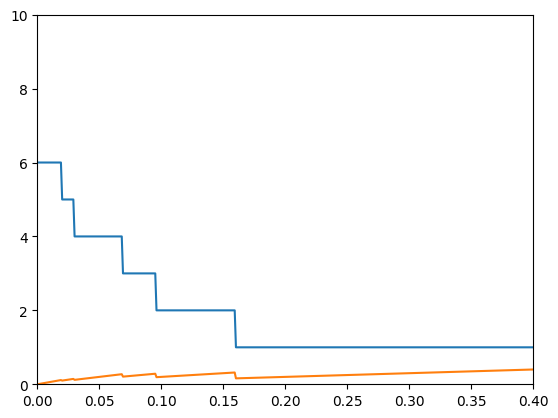

In [2]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(0, 1, 1000)
y = []
z = []
rd = []
for _x in x:
    if _x < 0.02:
        _y = 6
    elif _x < 0.03:
        _y = 5
    else:
        _y = min(4, max(1, round(0.24/_x)))
    y.append(_y)
    z.append(_x*_y)
    if _x != 0: rd.append(round(0.24/_x))
rd.insert(0, rd[0])
plt.ylim(0, 10)
plt.xlim(0, 0.4)
plt.plot(x, y)
plt.plot(x, z)
# plt.plot(x, rd)
plt.show()

## Show density distribution of the dataset
### Define functions and global variables

In [1]:
'''
Author: tianhao 120090472@link.cuhk.edu.cn
Date: 2023-09-26 09:57:54
LastEditors: tianhao 120090472@link.cuhk.edu.cn
LastEditTime: 2023-09-29 16:22:53
FilePath: /DatProc/misc.ipynb
Description: 
    Code to rebalance Dataset
Copyright (c) 2023 by ${git_name_email}, All Rights Reserved. 
'''
import os
import json
import argparse
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from scipy import stats
from multiprocessing import Pool
from matplotlib import pyplot as plt
from scipy.optimize import minimize

from utils.cam_pose_utils import get_cam_coords

def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("-i", "--input_path", type=str, help="path to json metafile", default="/data2/chence/single_view_hq/dataset.json")
    parser.add_argument("-o", "--output_dir", type=str, help="path to output directory", default="./temp")
    parser.add_argument("-j", "--num_workers", type=int, help="number of workers", default=256)
    # parser.add_argument("--force", action="store_true", help="force to overwrite existing files")
    args, _ = parser.parse_known_args()
    return args

def get_coord():
    """
    Load camera position. A npy file is created to save. If operation is forced, the npy file will be overwritten.
    """
    coords_save_path = os.path.join(args.output_dir, "coords.npy")
    coords = []
    if not(hasattr(args, 'force')):
        if os.path.exists(coords_save_path):
            coords = np.load(coords_save_path)

    if isinstance(coords, list):
        print(f'Calculating coords...')
        with open(args.input_path, 'r') as f:
            json_data = json.load(f)
        for img_path, img_meta in tqdm(json_data.items()):
            c2w = np.array(img_meta["camera"][:16]).reshape(4,4)
            theta, phi, r, x, y, z = get_cam_coords(c2w)
            if theta < -90 and theta >= -180: theta += 360
            coords.append((theta, phi))
        coords = np.array(coords)
        np.save(coords_save_path, coords)
    return coords

def get_density(coords: np.array):
    """
    Load density file. A npy file is created to save. If operation is forced, the npy file will be overwritten.
    """
    global kernel
    density_save_path = os.path.join(args.output_dir, "density.npy")
    densities = []
    kernel = stats.gaussian_kde(coords.T)
    if not(hasattr(args, 'force')):
        if os.path.exists(density_save_path):
            densities = np.load(density_save_path)

    if isinstance(densities, list):
        print(f'Calculating density...')
        for coord in tqdm(coords):
            density = kernel(coord)
            densities.append(density)
        densities = np.array(densities)
        print(f'Maximum density: {np.max(densities)}, Minimum density: {np.min(densities)}')
        np.save(density_save_path, densities)
    return densities

def get_num_duplicate(densities: np.array, bin_bounds: np.array, a=0.002):
    N = []
    Z = []
    for density in tqdm(densities):
        if density < bin_bounds[1]:
            _N = len(bin_bounds) - 1
        else:
            _N = min(len(bin_bounds) - 2, max(1, round(a/density)))
        N.append(_N)
        Z.append(density*_N)
    return N, Z

kernel = None
args = parse_args()
with open(args.input_path, 'r') as f:
    json_data = json.load(f)

### Show a sample entry in the dataset

In [ ]:
for image_name, image_meta in json_data.items():
    print(json.dumps(image_meta, indent=4))
    break

### Calculate the density distribution of camera pose

In [2]:
coords = get_coord()
densities = get_density(coords)
theta = coords[:, 0]
phi = coords[:, 1]
densities_unique, counts = np.unique(densities, return_counts=True)
# cumulative_counts = np.cumsum(counts)
# find_percentiles = [0, 20, 40, 60, 80, 100]
max_density = densities_unique[-1]
max_dup_nums = [8]
colors = ['b', 'g', 'r', 'c']
for max_dup_num, color in zip(max_dup_nums, colors):
    density_bounds = [0] + [max_density / i for i in range(max_dup_num, 0, -1)]


In [ ]:
x, y = np.meshgrid(np.arange(-90, 271), np.arange(44, 125))
grid_coords = np.vstack([x.ravel(), y.ravel()])
grid_density = []
for coord in tqdm(grid_coords.T):
    density = kernel(coord)
    grid_density.append(density)
grid_density = np.array(grid_density).reshape(x.shape)

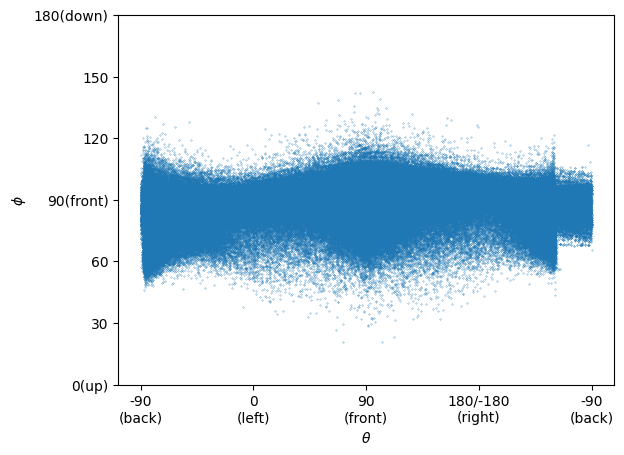

In [5]:
# np.save(os.path.join(args.output_dir, "grid_density.npy"), grid_density)
fig, ax1 = plt.subplots()
# plt.contourf(x, y, grid_density, cmap='viridis', levels=20) 
ax1.scatter(theta, phi, s=0.05)#, c='white')
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"$\phi$")
ax1.set_xticks(np.arange(-90, 271, 90))
ax1.set_yticks(np.arange(0, 181, 30))
# ax1.set_xlim(-100, 300)
# ax1.set_ylim(-20, 200)
ax1.set_xticklabels(['-90\n(back)', '0\n(left)', '90\n(front)', '180/-180\n(right)', '-90\n(back)'])
ax1.set_yticklabels(['0(up)', '30', '60', '90(front)', '120', '150', '180(down)'])
plt.show()


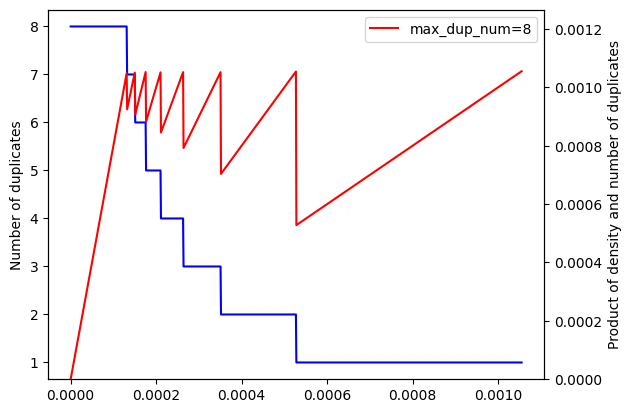

In [3]:
data_labels = []
product_result = []
fig, ax2 = plt.subplots()
ax3 = ax2.twinx()   
ax_xrange = np.linspace(densities_unique[0], densities_unique[-1], 1000)
for value in ax_xrange:
    for idx, _ in enumerate(density_bounds[:-1]):
        if density_bounds[idx] <= value <= density_bounds[idx+1]:
            dup_num = len(density_bounds) - idx - 1
            data_labels.append(dup_num)
            product_result.append(value*dup_num)
            break
ax2.plot(ax_xrange, data_labels, color='b')
ax2.set_ylabel("Number of duplicates")
ax2.set_yticks(np.arange(1,max(max_dup_nums)+1))
ax3.plot(ax_xrange, product_result, color='r', label=f"max_dup_num={max_dup_num}")
ax3.set_ylim(0, max_density*1.2)
ax3.set_ylabel("Product of density and number of duplicates")
ax3.legend(loc='upper right')
plt.show()

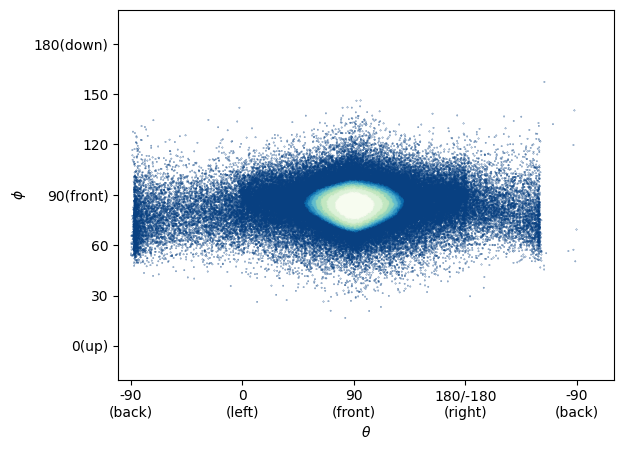

In [4]:
fig, ax4 = plt.subplots()
N = []
for value in densities:
    for i in range(len(density_bounds)-1):
        if density_bounds[i] <= value <= density_bounds[i+1]:
            N.append(len(density_bounds) - i)
            break
N = np.array(N)
ax4.scatter(theta, phi, s=0.05, c=N, cmap='GnBu')
ax4.set_xlabel(r"$\theta$")
ax4.set_ylabel(r"$\phi$")
ax4.set_xticks(np.arange(-90, 271, 90))
ax4.set_yticks(np.arange(0, 181, 30))
ax4.set_xlim(-100, 300)
ax4.set_ylim(-20, 200)
ax4.set_xticklabels(['-90\n(back)', '0\n(left)', '90\n(front)', '180/-180\n(right)', '-90\n(back)'])
ax4.set_yticklabels(['0(up)', '30', '60', '90(front)', '120', '150', '180(down)'])
plt.show()

Percntile 0.1, phi: 48.8622242653656; theta: -88.98356389359346
Percntile 50, phi: 85.22697294296465; theta: 81.01653309689034
Percntile 99.9, phi: 115.93806056482318; theta: 268.9493846692784


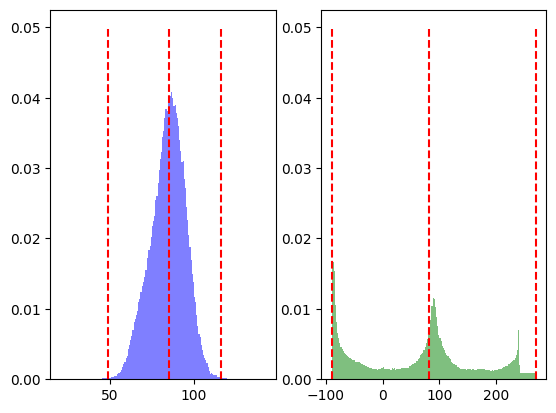

In [7]:
fig, ax5 = plt.subplots()
ax5.hist(phi, bins=180, density=True, color='b', alpha=0.5, label=r"$\phi$")
ax5.set_xticks(np.arange(0, 181, 30))
ax5.set_xticklabels(['0\n(up)', '30', '60', '90\n(front)', '120', '150', '180\n(down)'])
percentiles = [0.1, 50, 99.9]
res = np.percentile(phi, percentiles)
ax5.vlines(res, 0, 0.05, colors='r', linestyles='dashed')
for val, per in zip(res, percentiles):
    print(f'Percntile {per}={val}')
plt.show()

Let's set the lower bound to 44 and upper bound to 124

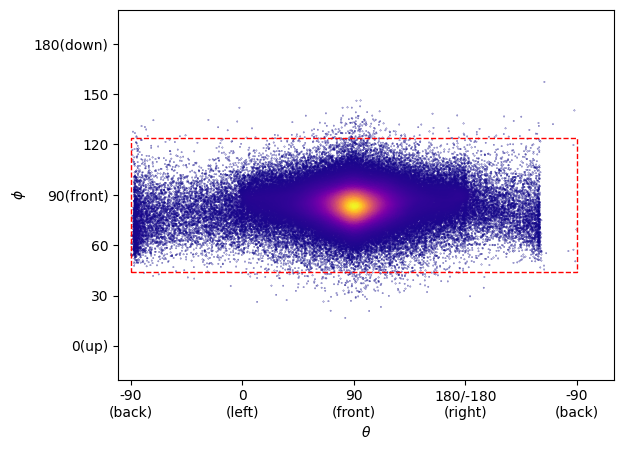

In [6]:
fig, ax6 = plt.subplots()
ax6.scatter(theta, phi, s=0.05, c=densities, cmap='plasma')
ax6.set_xlabel(r"$\theta$")
ax6.set_ylabel(r"$\phi$")
ax6.set_xticks(np.arange(-90, 271, 90))
ax6.set_yticks(np.arange(0, 181, 30))
ax6.set_xlim(-100, 300)
ax6.set_ylim(-20, 200)
ax6.set_xticklabels(['-90\n(back)', '0\n(left)', '90\n(front)', '180/-180\n(right)', '-90\n(back)'])
ax6.set_yticklabels(['0(up)', '30', '60', '90(front)', '120', '150', '180(down)'])
ax6.add_patch(mpl.patches.Rectangle((-90, 44), 360, 80, fill=False, color='r', linestyle='dashed'))
plt.show()

In [7]:
percision = 0
coords = np.array(coords)
coords = coords[(coords[:, 0] >= -90) & (coords[:, 0] < 270) & (coords[:, 1] >= 44) & (coords[:, 1] < 124)]
coords = np.round(coords).astype(np.int32)
required_coords = np.zeros((80, 360))
for coord in coords:
    required_coords[coord[1]-44, coord[0]+90] += 1
zy, zx = np.where(required_coords == 0)
# theta_edges = np.arange(-90, 270, 1)
# phi_edges = np.arange(phi_low, phi_high, 1)
# H, _, _ = np.histogram2d(theta, phi, bins=(theta_edges, phi_edges))
# H = H.T
# X, Y = np.meshgrid(theta_edges, phi_edges)
# print(X.shape, Y.shape, H.shape)

IndexError: index 80 is out of bounds for axis 0 with size 80

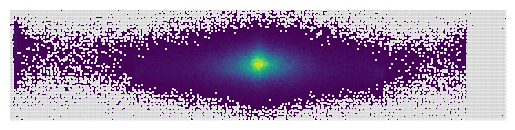

In [58]:
fig, ax7 = plt.subplots()
pcm = ax7.imshow(3, cmap='viridis')
ax7.imshow(required_coords, cmap='viridis', vmin=required_coords.min(), vmax=required_coords.max())  # Use the full range of data
ax7.scatter(zx, zy, s=1, c='w', marker='s', edgecolors='black', linewidths=0.05)
# turn off x-axis and y-axis
ax7.axis('off')
plt.show()
# pcm = ax7.pcolormesh(X, Y, H)
# ax7.set_xlabel(r"$\theta$")
# ax7.set_ylabel(r"$\phi$")
# ax7.set_xticks(np.arange(-90, 271, 90))
# ax7.set_yticks(np.arange(0, 181, 30))
# ax7.set_xlim(-100, 300)
# ax7.set_ylim(-20, 200)
# ax7.set_xticklabels(['-90\n(back)', '0\n(left)', '90\n(front)', '180/-180\n(right)', '-90\n(back)'])
# ax7.set_yticklabels(['0(up)', '30', '60', '90(front)', '120', '150', '180(down)'])

# Checking image channels

In [4]:
import os
import numpy as np
from PIL import Image

parsing_results = {
    'align_parsing_path':'/data2/chence/ExportedMVhq/align_parsing',
    'head_parsing_path':'/data2/chence/ExportedMVhq/head_parsing'
}

# get all file paths from all the directories
image_file_paths = []
for path_name, _path in parsing_results.items():
    for paths, roots, files in os.walk(_path):
        for file in files:
            file_path = os.path.join(paths, file)
            # check if the file is an image
            if file_path.endswith('.png') or file_path.endswith('.jpg') or file_path.endswith('.jpeg'):
                image_file_paths.append(file_path)

In [5]:
import cv2
import tqdm
import multiprocessing

def process_image(image_file_path):
    image = Image.open(image_file_path)
    mode = image.mode
    if mode == 'RGB':
        image_arr = np.array(image)
        r, g, b= cv2.split(image_arr)
        assert np.array_equal(r, g) and np.array_equal(b, g) and np.array_equal(r, b)

if __name__ == '__main__':
    with multiprocessing.Pool(128) as pool:
        list(tqdm.tqdm(pool.imap_unordered(process_image, image_file_paths), total=len(image_file_paths)))


100%|██████████| 537614/537614 [08:22<00:00, 1069.07it/s]


The cell above should have no error, which indicates that all channels are same, meaning that they are boradcasted from the first channel.

In [7]:
import cv2
import tqdm
import multiprocessing

def process_image(image_file_path):
    image = Image.open(image_file_path)
    mode = image.mode
    if mode == 'RGB':
        image_arr = np.array(image)
        r, g, b= cv2.split(image_arr)
        new_image = Image.fromarray(r)
        new_image.save(image_file_path)

if __name__ == '__main__':
    with multiprocessing.Pool(128) as pool:
        list(tqdm.tqdm(pool.imap_unordered(process_image, image_file_paths), total=len(image_file_paths)))


100%|██████████| 537614/537614 [07:26<00:00, 1205.08it/s]


In [8]:
import subprocess
from multiprocessing import Pool
from tqdm import tqdm

samples = 10

def process_image(image_path):
    result = subprocess.run(f"identify -verbose {image_path} | grep -e Colorspace -e Type", capture_output=True, text=True, shell=True)
    output_str = result.stdout
    try:
        _, cspace, _, itype = output_str.split()
        if itype != 'Grayscale':
            return (image_path, cspace, itype)
    except:
        print(image_path)
    return None

if __name__ == '__main__':
    results = []
    with Pool(128) as pool:
        for res in tqdm(pool.imap_unordered(process_image, image_file_paths), total=len(image_file_paths)):
            if res is not None:
                results.append(res)
    for res in results:
        print(res)


100%|██████████| 537614/537614 [1:00:14<00:00, 148.72it/s]


In [17]:
all_folders = ['align_images', 'align_parsing', 'head_images', 'head_parsing']
for res in results:
    image_path, _, _ = res
    for folder in all_folders:
        _image_path = image_path.replace('align_parsing', folder)
        os.remove(_image_path)

[0]


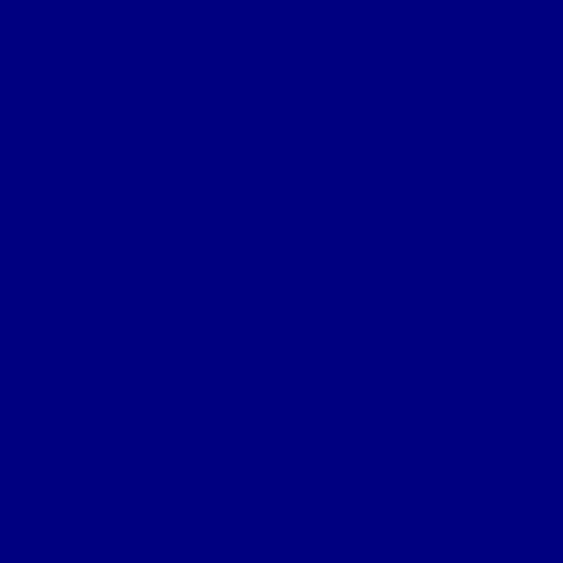

In [11]:
bivalue_img_path = '/data2/chence/ExportedSVhq/align_parsing/00031/img00031108.png'
image = cv2.imread(bivalue_img_path, cv2.IMREAD_GRAYSCALE)
color_image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
print(np.unique(image))
color_image = Image.fromarray(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
display(color_image)

